In [15]:
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

centers = np.array([[-5,7],
                  [0,0],
                  [10,10]])
X, y = make_blobs(n_samples=1000, centers=centers, n_features=2, random_state=0)

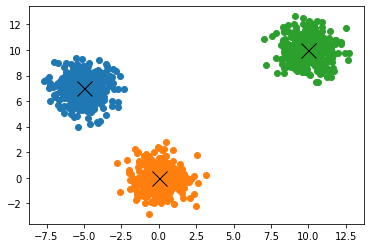

In [16]:
for i in range(3):
    plt.plot(X[y==i,0], X[y==i,1], 'o')
for i in range(3):
    plt.plot(centers[i,0], centers[i,1], 'kx', markersize = 15)

# GMM

Algorithm
![](kmeans.png)

EM
![](EM.png)

In [17]:
X

array([[-6.04855297,  5.57998206],
       [-3.23594765,  7.40015721],
       [ 9.50420451, 11.21657771],
       ...,
       [ 0.60711167, -1.04817041],
       [ 1.63159743,  0.37775917],
       [ 9.02759711, 11.34622107]])

In [18]:
K = centers.shape[0]
K

3

In [19]:
prior = np.array([1/K] * K)
prior

array([0.33333333, 0.33333333, 0.33333333])

In [20]:
S = np.array(
    [[[1,0],[0,1]]
    for i in range(K)])
S

array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]]])

In [21]:
m = np.random.rand(K,X.shape[1])* 10
m

array([[7.31820047, 8.47862884],
       [1.57364783, 2.8035553 ],
       [3.23406153, 5.35233664]])

In [27]:
# compute h

h = np.array([
    [multivariate_normal.pdf(x, m[i], S[i]) *  prior[i] 
    for i in range(K)] for x in X])
h = h/h.sum(keepdims =True, axis = 1)
h

array([[4.65006236e-27, 9.99963058e-01, 3.69417283e-05],
       [1.05191045e-15, 7.10294547e-01, 2.89705453e-01],
       [1.00000000e+00, 4.35336312e-27, 4.57987638e-14],
       ...,
       [8.63203718e-27, 9.99999893e-01, 1.07187455e-07],
       [1.01494082e-20, 9.99977752e-01, 2.22480572e-05],
       [1.00000000e+00, 3.22368221e-26, 2.13894926e-13]])

In [29]:
prior = h.mean(axis = 0)
prior

array([0.333     , 0.64111517, 0.02588483])

In [32]:
X

array([[-6.04855297,  5.57998206],
       [-3.23594765,  7.40015721],
       [ 9.50420451, 11.21657771],
       ...,
       [ 0.60711167, -1.04817041],
       [ 1.63159743,  0.37775917],
       [ 9.02759711, 11.34622107]])

In [49]:
h.sum(keepdims =True, axis = 0)

array([[332.99999833, 641.11517102,  25.88483064]])

In [46]:
m = np.array([(X * h[:, i:(i+1)]).sum(axis = 0) for i in range(K)])
m

array([[ 3315.8229131 ,  3346.45744164],
       [-1571.24253192,  2098.60874928],
       [ -106.31686557,   213.03052629]])

In [52]:
m = m/h.sum(keepdims =True, axis = 0).T
m

array([[ 9.95742622, 10.0494218 ],
       [-2.45079605,  3.27337247],
       [-4.10730389,  8.22993703]])

In [60]:
i = 0
Si = X - m[i,:]
Si

array([[-16.00597918,  -4.46943973],
       [-13.19337387,  -2.64926459],
       [ -0.45322171,   1.16715592],
       ...,
       [ -9.35031454, -11.0975922 ],
       [ -8.32582879,  -9.67166263],
       [ -0.9298291 ,   1.29679928]])

In [61]:
Si.T.dot(Si)

array([[109143.60732905,  48730.52249238],
       [ 48730.52249238,  38060.69518283]])

In [69]:
hi = h[:, i:(i+1)]
Shi = Si * hi
Shi.T.dot(Shi)

array([[312.11383709, -11.57721223],
       [-11.57721223, 326.77666353]])

In [75]:
Si = Shi.T.dot(Shi)/hi.sum()
Si

array([[ 0.93727879, -0.0347664 ],
       [-0.0347664 ,  0.98131131]])

# GMM

In [79]:
K = centers.shape[0]
prior = np.array([1/K] * K)

S = np.array(
    [[[1,0],[0,1]]
    for i in range(K)])

m = np.random.rand(K,X.shape[1])* 10

In [80]:
# Expectation Step
h = np.array([
    [multivariate_normal.pdf(x, m[i], S[i]) *  prior[i] 
    for i in range(K)] for x in X])
h = h/h.sum(keepdims =True, axis = 1)

In [81]:
# Maximisation Step
m = np.array([(X * h[:, i:(i+1)]).sum(axis = 0) for i in range(K)])
m = m/h.sum(keepdims =True, axis = 0).T
m

array([[-3.9743311 ,  8.70983284],
       [ 9.95742687, 10.04942161],
       [-2.50911138,  3.44427568]])

In [84]:
S = []
for i in range(K):
    Si = X - m[i,:]
    hi = h[:, i:(i+1)]
    Shi = Si * hi
    Shi.T.dot(Shi)
    Si = Shi.T.dot(Shi)/hi.sum()
    S.append(Si)
S = np.array(S)
S

array([[[ 0.07593331, -0.02086083],
        [-0.02086083,  0.03223065]],

       [[ 0.93727518, -0.03476531],
        [-0.03476531,  0.98131122]],

       [[ 7.61150801, -9.01680157],
        [-9.01680157, 13.0774389 ]]])

# GMM Code

In [91]:
# initialization
K = centers.shape[0]
prior = np.array([1/K] * K)

S = np.array(
    [[[1,0],[0,1]]
    for i in range(K)])

m = np.random.rand(K,X.shape[1])* 10
means = []
means.append(m)

In [92]:
for i in range(100):
    # Expectation Step
    h = np.array([
        [multivariate_normal.pdf(x, m[i], S[i]) *  prior[i] 
        for i in range(K)] for x in X])
    h = h/h.sum(keepdims =True, axis = 1)
    
    # Maximisation Step
    m = np.array([(X * h[:, i:(i+1)]).sum(axis = 0) for i in range(K)])
    m = m/h.sum(keepdims =True, axis = 0).T
    
    S = []
    for i in range(K):
        Si = X - m[i,:]
        hi = h[:, i:(i+1)]
        Shi = Si * hi
        Shi.T.dot(Shi)
        Si = Shi.T.dot(Shi)/hi.sum()
        S.append(Si)
    S = np.array(S)
    
    prior = h.mean(axis = 0)
    
    means.append(m)

In [93]:
def draw(X, means, ix = 0):
    print(means[ix])
    for i in range(3):
        plt.plot(X[y==i,0], X[y==i,1], 'o')
    for i in range(3):
        plt.plot(means[ix][i,0], means[ix][i,1], 'kx', markersize = 15)

[[6.99528419 5.33990429]
 [0.44182102 8.23017903]
 [2.09883494 3.05971039]]


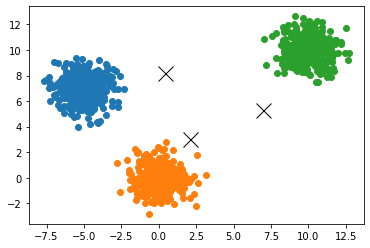

In [94]:
draw(X, means, ix = 0)

[[ 9.9574262  10.04942179]
 [-5.09062547  6.96406452]
 [ 0.0681967  -0.04311801]]


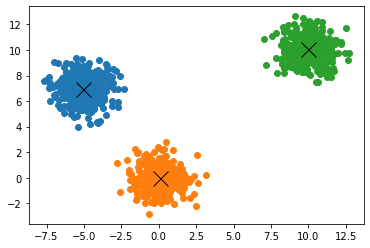

In [95]:
draw(X, means, ix = 5)

[[ 9.9574262  10.04942179]
 [-5.09062547  6.96406452]
 [ 0.0681967  -0.04311801]]


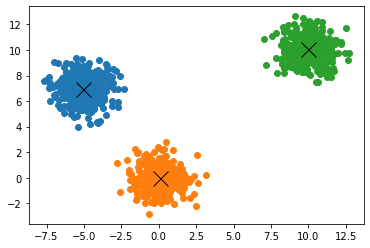

In [96]:
draw(X, means, ix = 10)

[[ 9.9574262  10.04942179]
 [-5.09062547  6.96406452]
 [ 0.0681967  -0.04311801]]


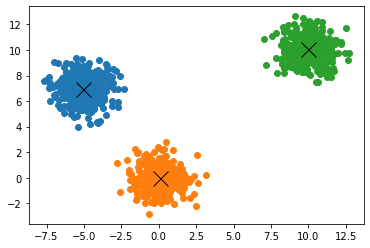

In [97]:
draw(X, means, ix = 20)

[[ 9.9574262  10.04942179]
 [-5.09062547  6.96406452]
 [ 0.0681967  -0.04311801]]


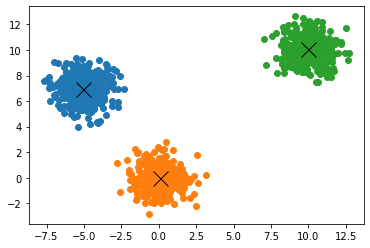

In [98]:
draw(X, means, ix = 50)